# Convolutional Neural Networks in pyTorch

In class, we discussed the mathematics of Convolutional Neural Networks (CNNs), which a neural network architectures with discrete convolution layers. In this activity, we will build and train a CNN for classification of the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. 

## To Do:
### 1. Take a moment to read about the dataset linked above. Like the MNIST dataset of handwritten digits, this is a widely used benchmark dataset in machine learning.

### 2. We first load and scale the data using `pyTorch` (I did this step for you this time).

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix



In [3]:
# Define transformations
transform = transforms.ToTensor()


# Load Fashion MNIST dataset
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False)


### 3. Visualize the images to make sure you understand the data. (I looked at pictures, checked the numbers for scaling, and checked the shapes)

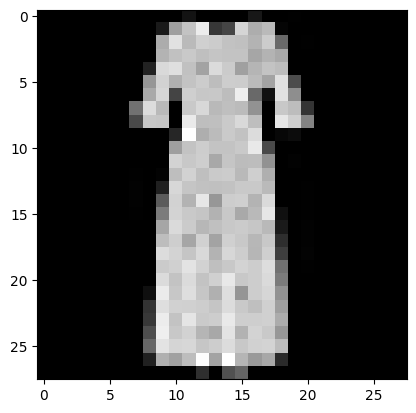

Dress


In [5]:

# Class labels that associate with numeric labels in dataset: 0,1,2,3,4,5,6,7,8,9
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

# Visualize images
def imshow(img):
    npimg = img.numpy()
    print(npimg.shape)
    plt.imshow(npimg)
    plt.show()

# Get a random batch of data:
dataiter = iter(trainloader)
images, labels = next(dataiter) # get one batch

#plot some images, their labels, shapes, etc. I converted to numpy for this
#complete me



### 4. Build the CNN architecture using `torch`

We will build a CNN with the following architecture:

    - Two convolutional layers:
       - Layer 1: 32 3x3 filters, ReLU activation, and max pooling w/ 2x2 filter
       - Layer 2: 64 3x3 filters, ReLU activation, and max pooling w/ 2x2 filter
    - One fully connected hidden layer w/ 128 nodes
    - Output layer

Check out the [Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) documentation to learn more about the `pyTorch` implementation.

In [85]:
class CNN(nn.Module): # We inherit from torch's Module class
    def __init__(self):
        super(CNN, self).__init__() # call the constructor from Module
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)  # I padded so I can more easily figure out next dimensions
        self.pool = nn.MaxPool2d(2, 2) # can use this for any 2x2 convs in your architecture
        self.conv2 = #complete me
        self.hidden = nn.Linear(# complete me
        self.out # complete me
        
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))# 
        # complete me
        x = x.view(-1, #dim)  # Flatten the tensor
        # complete me
        return x

cnet = CNN() # create instance of class
print(cnet) # check that architecture is what you expected

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (out): Softmax(dim=None)
)


## 5. Train our model

In [91]:
# Define loss function and optimizer
loss_f = nn.#Loss function
optimizer = optim.Adam(net.parameters(), lr=0.001) # this is suitable for the problem (Adam is an SGD-based optimizer)

# Training loop
for epoch in range(5):  # This is computationaly intensive, lets just do a few epochs
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0): # iterate through each batch
        print(i)
        inputs, labels = data
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward + backward + optimize
        outputs = cnet(inputs)
        loss = loss_f(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Print statistics
        running_loss += loss.item()
        if (i+1) % 500 == 0:  # print every 500 batches
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 500:.3f}')
            running_loss = 0.0

print('Finished Training')

SyntaxError: invalid syntax (832237645.py, line 2)

# Now evaluate the model on the test set

I have provided the code to make your confusion matrix. 

### Compute accuracy, precision, recall, and F1 score yourself using the confusion matrix.

In [88]:
def get_predictions(model, loader): # make predictions on entire test set
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())
    return all_preds, all_labels


In [89]:
y_pred, y_true = get_predictions(net, testloader)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)


/tmp/ipykernel_1367116/836704043.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.out(x)


[[820   2  24  34   3   1 100   0  16   0]
 [  1 978   0  16   2   0   0   0   3   0]
 [ 13   1 905  12  38   0  30   0   1   0]
 [ 13   6  18 909  22   0  26   0   6   0]
 [  0   1 130  30 790   0  47   0   2   0]
 [  0   0   1   0   0 967   0  26   1   5]
 [110   4 108  32  68   0 657   0  21   0]
 [  0   0   0   0   0   3   0 984   1  12]
 [  2   2   1   4   1   3   4   3 980   0]
 [  0   0   0   0   0   3   0  46   1 950]]


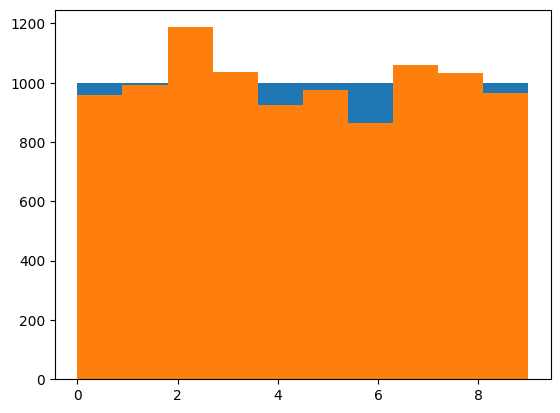

In [90]:
plt.hist(y_true)
plt.hist(y_pred)
plt.show()